#### Importing Libraries

In [1]:
import pandas as pd, numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import precision_recall_curve
from sklearn.feature_selection import RFE

# Understanding the Data

#### Loading data into a DataFrame

In [2]:
data = pd.read_csv('data/Leads.csv')
data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


Checking Data Characteristics

In [3]:
# Checking data Shape
data.shape

(9240, 37)

In [4]:
# checking columns with more than 30% missing values
null_values = data.isnull().sum()*100/data.shape[0]
null_values[null_values>30]

Tags                           36.287879
Lead Quality                   51.590909
Asymmetrique Activity Index    45.649351
Asymmetrique Profile Index     45.649351
Asymmetrique Activity Score    45.649351
Asymmetrique Profile Score     45.649351
dtype: float64

In [5]:
# Checking data description
data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [6]:
# checking data types
data.dtypes

Prospect ID                                       object
Lead Number                                        int64
Lead Origin                                       object
Lead Source                                       object
Do Not Email                                      object
Do Not Call                                       object
Converted                                          int64
TotalVisits                                      float64
Total Time Spent on Website                        int64
Page Views Per Visit                             float64
Last Activity                                     object
Country                                           object
Specialization                                    object
How did you hear about X Education                object
What is your current occupation                   object
What matters most to you in choosing a course     object
Search                                            object
Magazine                       

# Data Cleaning

In [7]:
# replacing 'select' values with null
data = data.replace('Select', np.nan)

In [8]:
# checking null values again
null_values = data.isnull().sum()*100/data.shape[0]
to_drop = [i for i in null_values[null_values>30].index]

#### Dropping values with more than 30% null values

In [9]:
data.drop(to_drop, axis=1, inplace=True)

In [10]:
# Checking null values again
null_values = data.isnull().sum()*100/data.shape[0]
null_values[null_values>0]

Lead Source                                       0.389610
TotalVisits                                       1.482684
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
dtype: float64

In [11]:
categorical_cols = [i for i in data.select_dtypes(include='object').columns]
numeric_cols = [i for i in data.select_dtypes(include='number').columns]

#### Checking unique Categories

In [12]:
# checking if a single value dominates the attribute
max_value_counts = pd.Series([round(data[i].value_counts().max()*100/data.shape[0],2) for i in categorical_cols], index= categorical_cols)
max_value_counts[max_value_counts > 90]

Do Not Email                                 92.06
Do Not Call                                  99.98
Search                                       99.85
Magazine                                    100.00
Newspaper Article                            99.98
X Education Forums                           99.99
Newspaper                                    99.99
Digital Advertisement                        99.96
Through Recommendations                      99.92
Receive More Updates About Our Courses      100.00
Update me on Supply Chain Content           100.00
Get updates on DM Content                   100.00
I agree to pay the amount through cheque    100.00
dtype: float64

The attributes shown have a very high contribution of a single value. They will add little to no value to our analysis. We will drop columns where the dominant entry takes up more than 90% of the column.

In [13]:
to_drop = [i for i in max_value_counts[max_value_counts > 90].index]
data.drop(to_drop, axis=1, inplace=True)

In [14]:
data['Lead Source'].fillna(data['Lead Source'].mode()[0], inplace=True)
data['Last Activity'].fillna(data['Last Activity'].mode()[0], inplace=True)
data['TotalVisits'].fillna(data['TotalVisits'].median(), inplace=True)
data['Page Views Per Visit'].fillna(data['Page Views Per Visit'].median(), inplace=True)

In [15]:
# Checking null values again
null_values = data.isnull().sum()*100/data.shape[0]
null_values[null_values>0]

Country                                          26.634199
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
dtype: float64

#### Inputing low null value columns 

#### Checking unique value columns

In [16]:
data['Prospect ID'].duplicated().sum()

0

In [17]:
data['Lead Number'].duplicated().sum()

0

Since Prospect ID and Lead number are unique values that have no duplicated values, they add no value to our analysis, we will drop them.

In [18]:
data.drop(['Lead Number', 'Prospect ID'], axis=1, inplace=True)

In [19]:
categorical_cols = [i for i in data.select_dtypes(include='object').columns]
numeric_cols = [i for i in data.select_dtypes(include='number').columns]

# Exploratory Data Analysis

In [20]:
data

,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,What is your current occupation,What matters most to you in choosing a course,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0.0,0,0.00,Page Visited on Website,NaN,Unemployed,Better Career Prospects,No,Modified
1,API,Organic Search,0,5.0,674,2.50,Email Opened,India,Unemployed,Better Career Prospects,No,Email Opened
2,Landing Page Submission,Direct Traffic,1,2.0,1532,2.00,Email Opened,India,Student,Better Career Prospects,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,0,1.0,305,1.00,Unreachable,India,Unemployed,Better Career Prospects,No,Modified
4,Landing Page Submission,Google,1,2.0,1428,1.00,Converted to Lead,India,Unemployed,Better Career Prospects,No,Modified
...,...,...,...,...,...,...,...,...,...,...,...,...
9235,Landing Page Submission,Direct Traffic,1,8.0,1845,2.67,Email Marked Spam,Saudi Arabia,Unemployed,Better Career Prospects,No,Email Marked Spam
9236,Landing Page Submission,Direct Traffic,0,2.0,238,2.00,SMS Sent,India,Unemployed,Better Career Prospects,Yes,SMS Sent
9237,Landing Page Submission,Direct Traffic,0,2.0,199,2.00,SMS Sent,India,Unemployed,Better Career Prospects,Yes,SMS Sent
9238,Landing Page Submission,Google,1,3.0,499,3.00,SMS Sent,India,NaN,NaN,No,SMS Sent


Cleaning up Categorical Data

In [21]:
# Replacing values with <5% contribution with as 'Others'

for i in categorical_cols:
    val_percentage = data[i].value_counts(normalize = True)*100
    to_replace = val_percentage[val_percentage<5].index.to_list()
    data[i] = data[i].replace(to_replace = to_replace, value ='Others')

#### Count plots

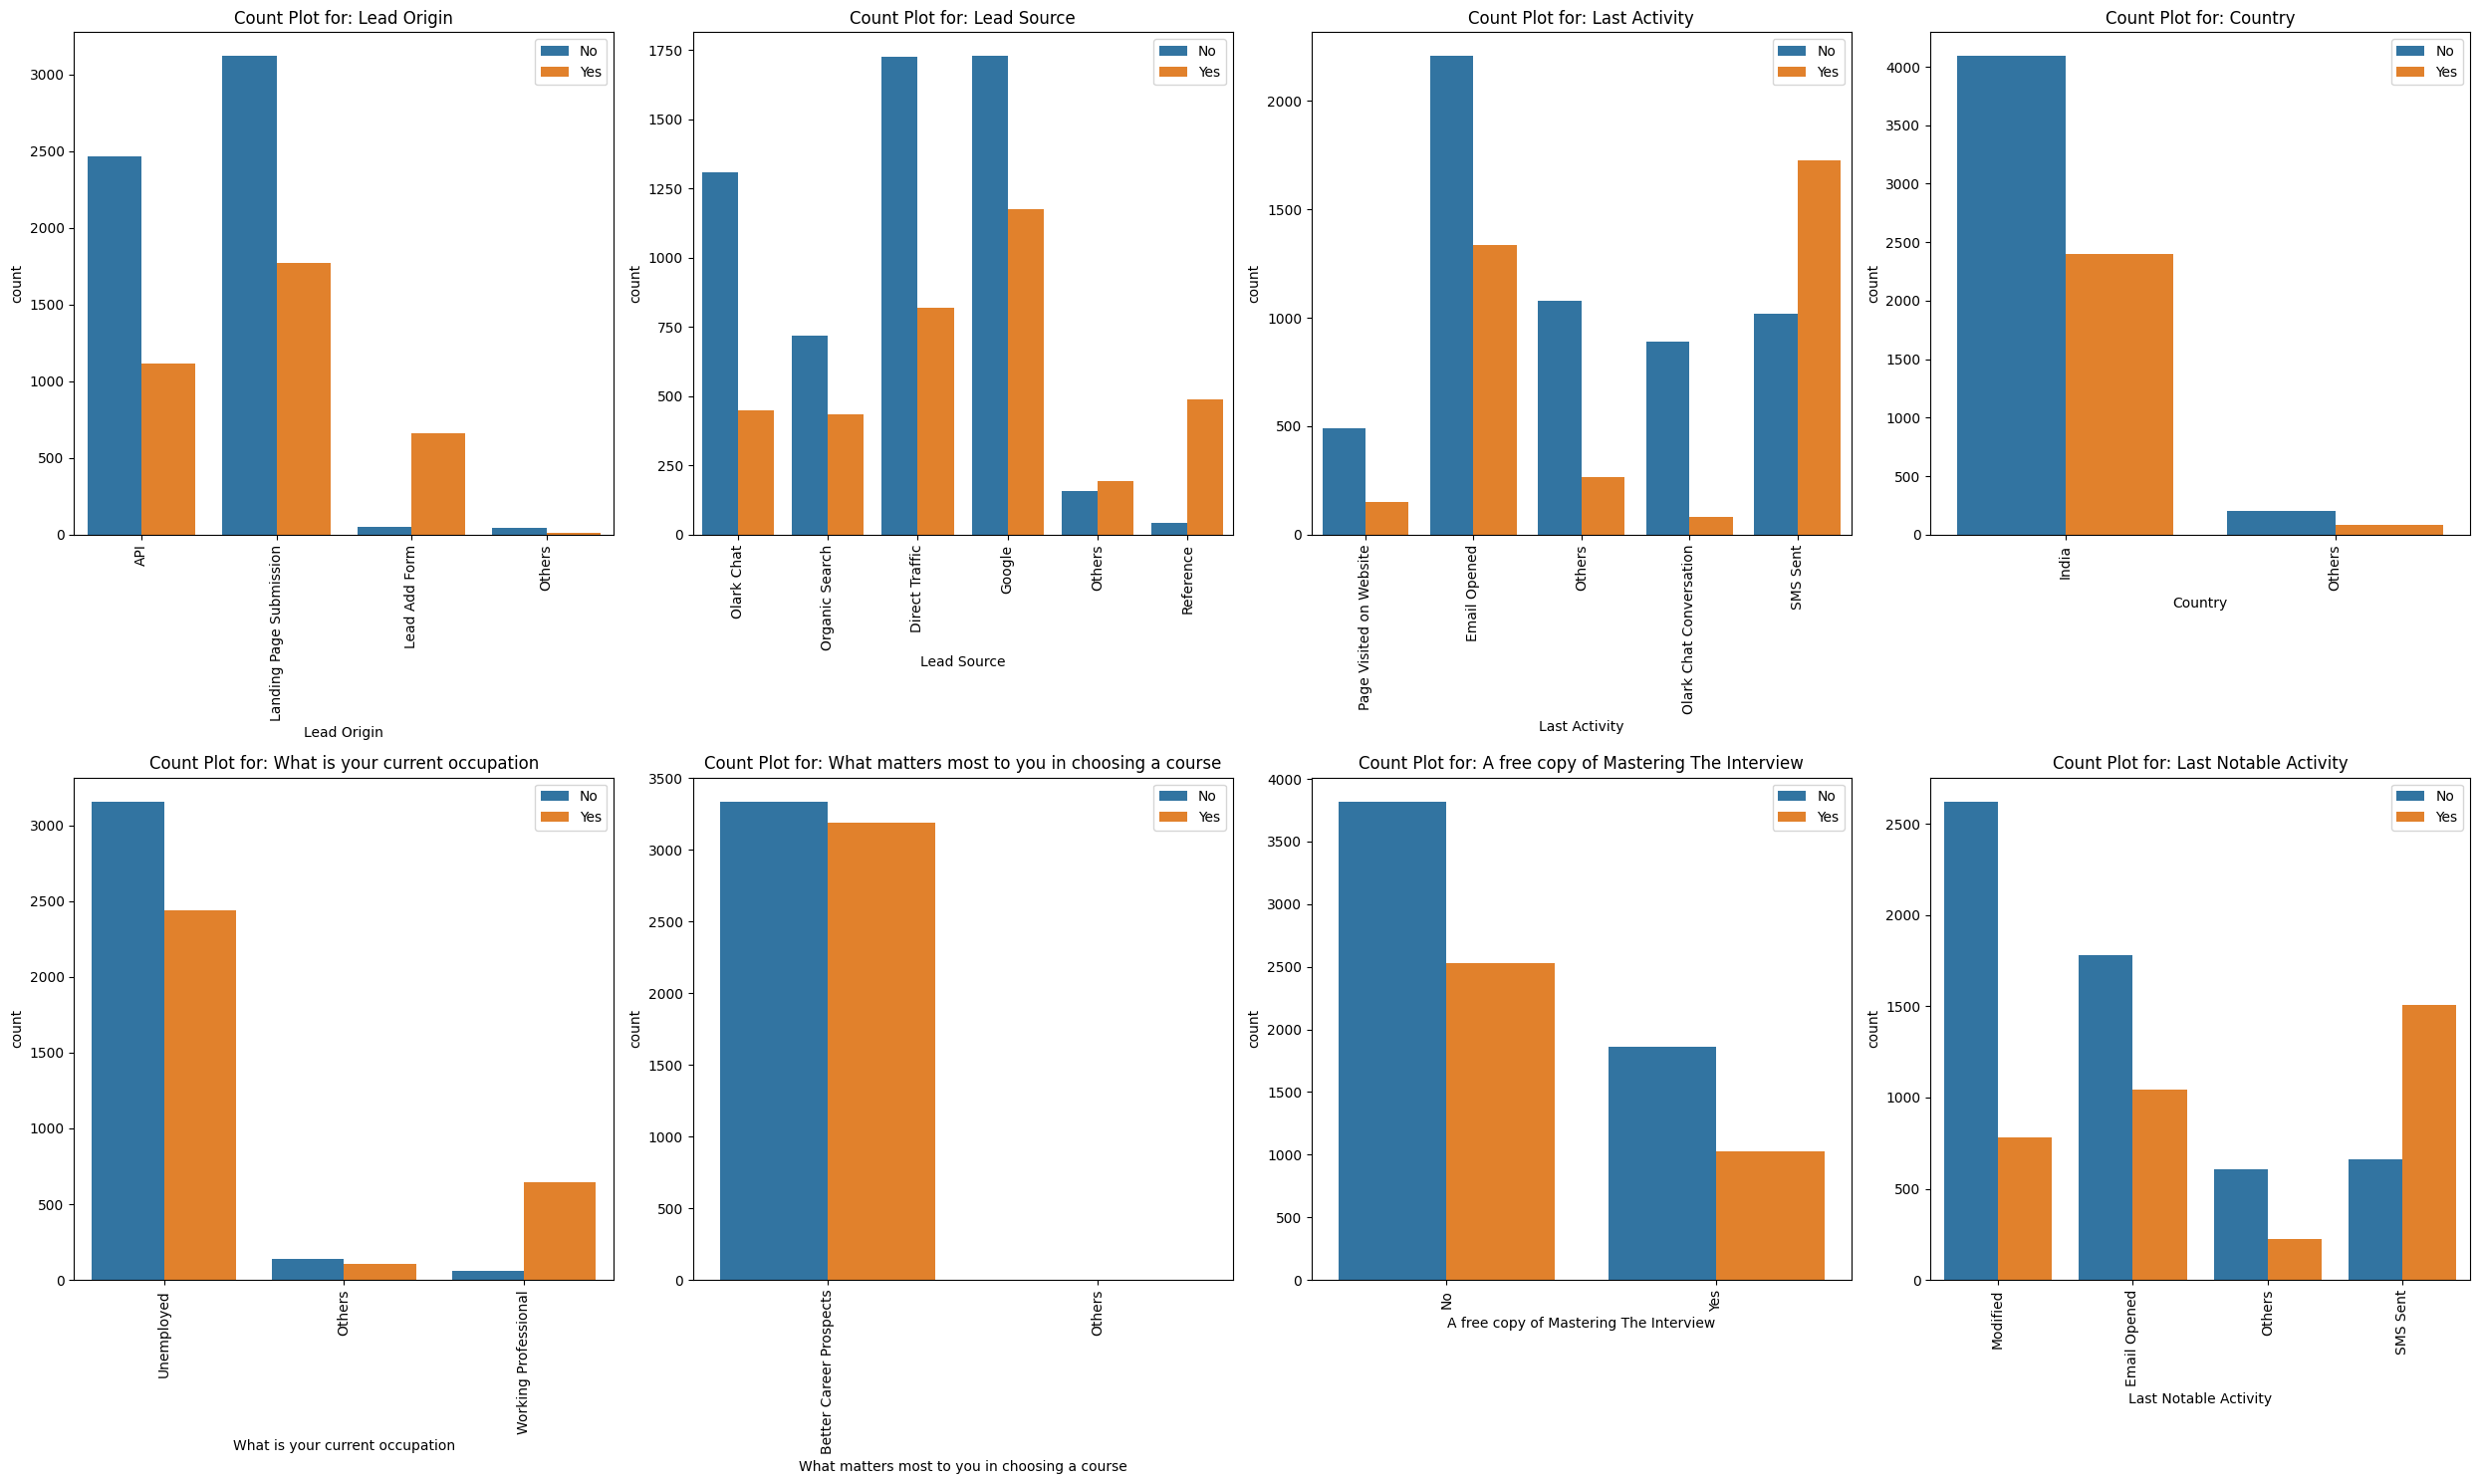

In [22]:
cnt = 1
plt.figure(figsize=(25,15))
for i in categorical_cols:
    plt.subplot(int(np.ceil(len(categorical_cols)/4)),4,cnt)
    sns.countplot(x=data[i],hue=data.Converted)
    plt.tight_layout()
    plt.title('Count Plot for: '+i)
    plt.xticks(rotation = 90)
    plt.legend(['No', 'Yes'])
    cnt += 1

# Boxplots

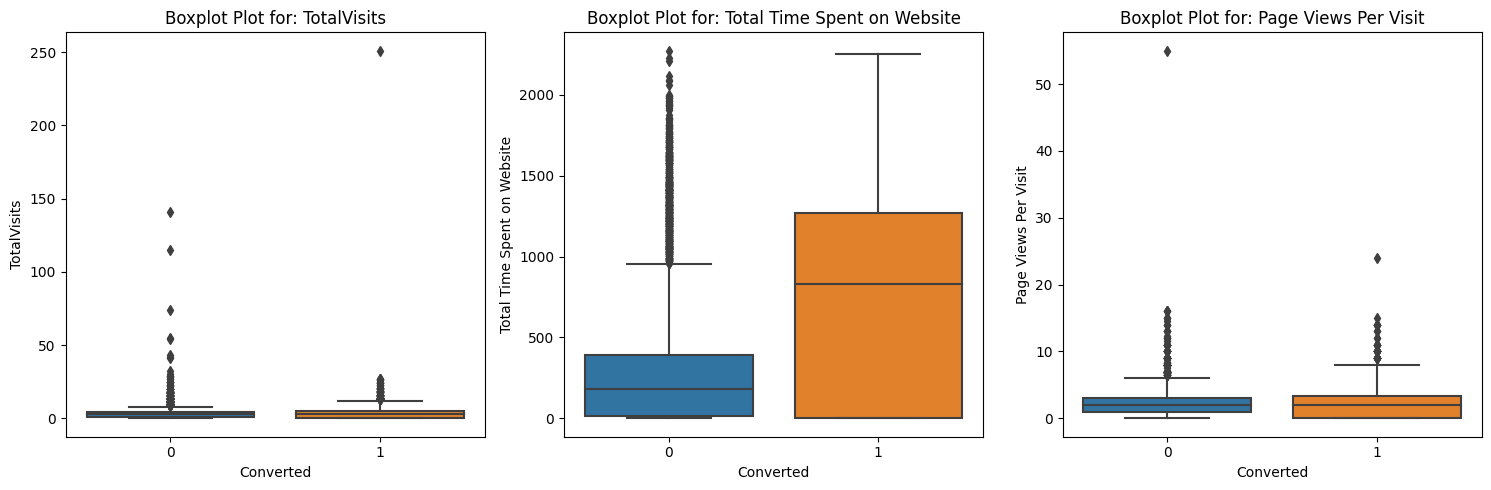

In [23]:
cnt = 1
plt.figure(figsize=(20,5))
for i in [i for i in numeric_cols if i != 'Converted']:
    plt.subplot(int(np.ceil(len(numeric_cols)/4)),4,cnt)
    sns.boxplot(y=data[i],x=data.Converted)
    plt.tight_layout()
    plt.title('Boxplot Plot for: '+i)
    cnt += 1

#### Pie Charts

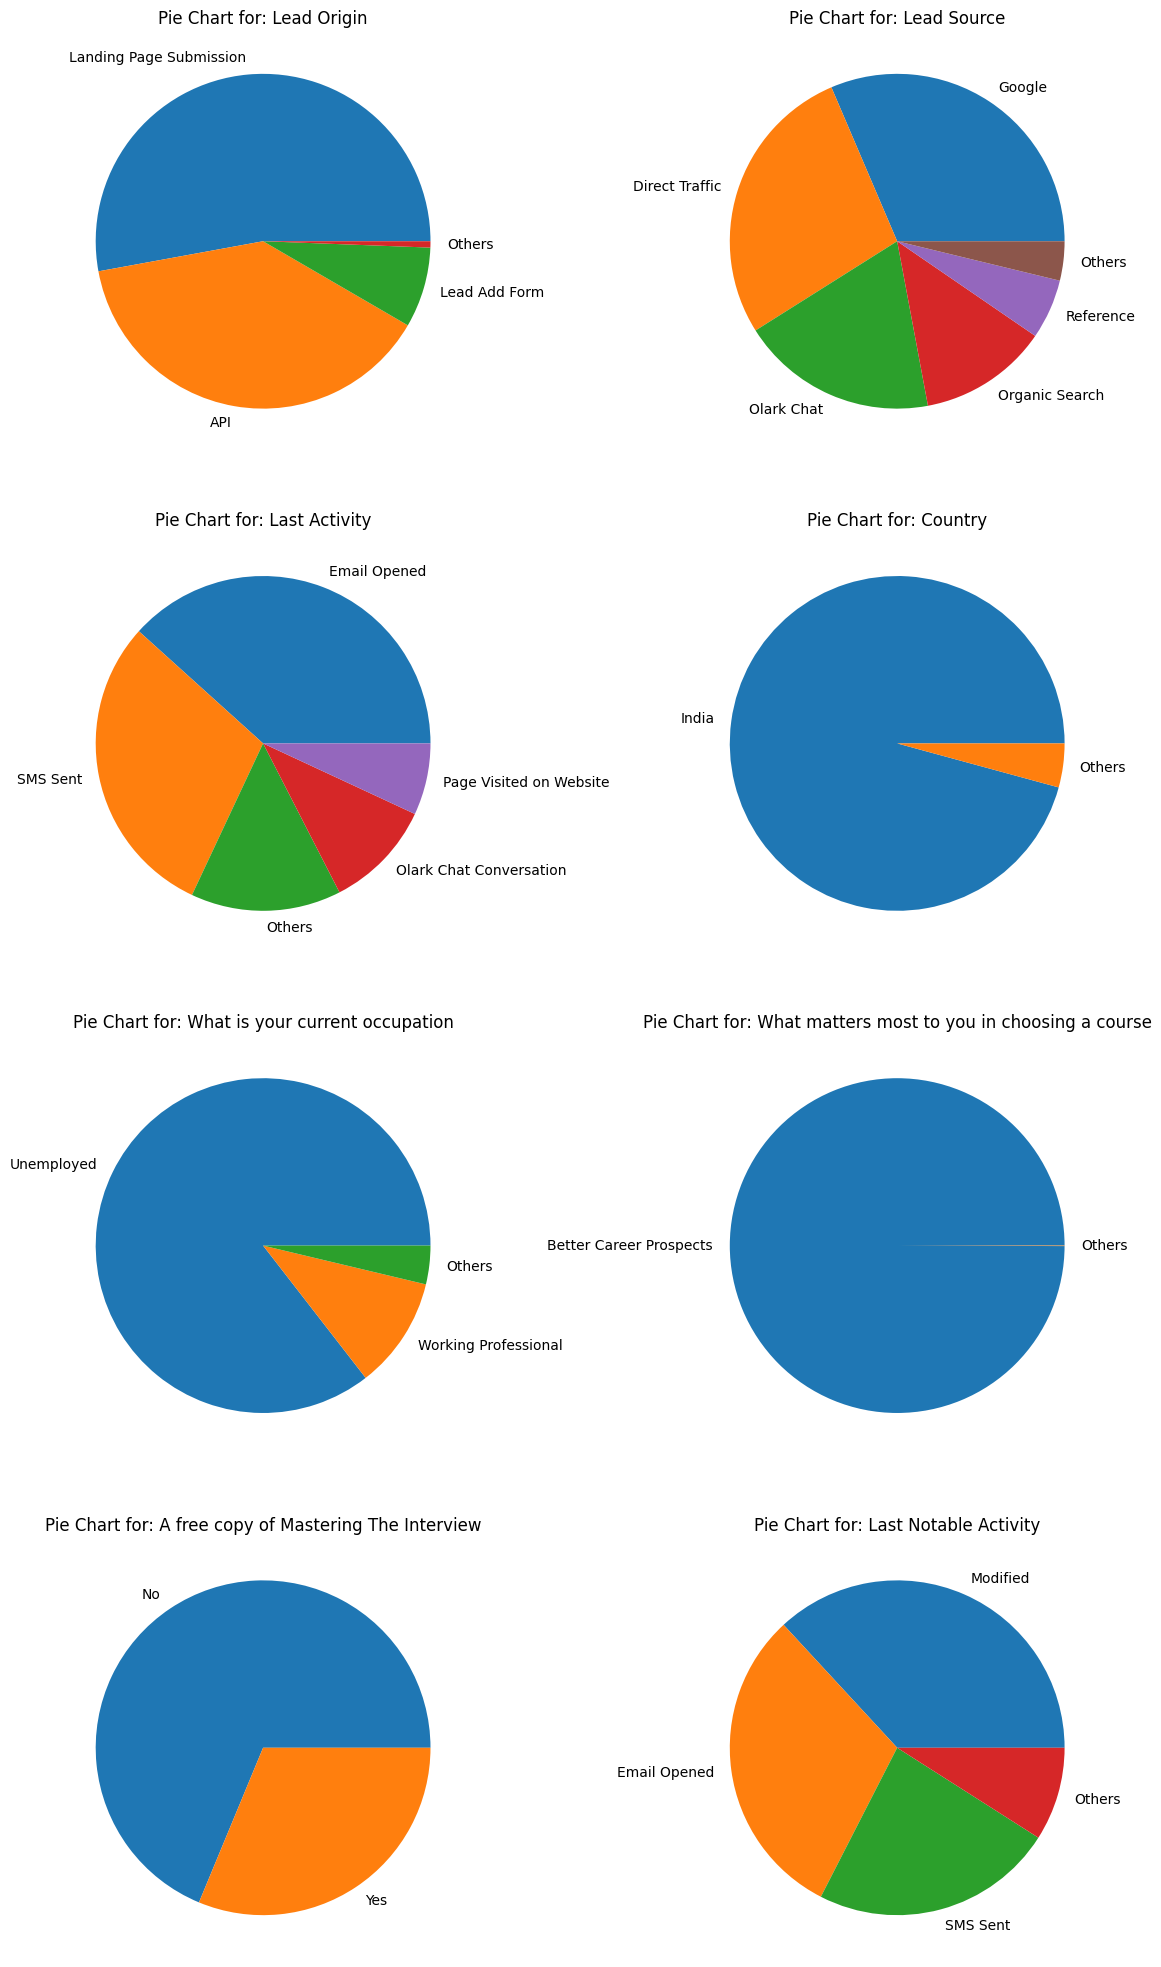

In [24]:
cnt = 1
plt.figure(figsize=(15,25))
for i in categorical_cols:
    plt.subplot(int(np.ceil(len(categorical_cols)/2)),2,cnt)
    data[i].value_counts(normalize=True).plot.pie()
    # plt.tight_layout()
    plt.ylabel('')
    plt.title('Pie Chart for: '+i)
    plt.xticks(rotation = 90)
    cnt += 1

#### Generating Dummy Variables

In [25]:
dummy = pd.get_dummies(data[categorical_cols], drop_first=True)
data = pd.concat([data,dummy], axis=1)
data.drop(categorical_cols, axis=1, inplace=True)

#### Correlation

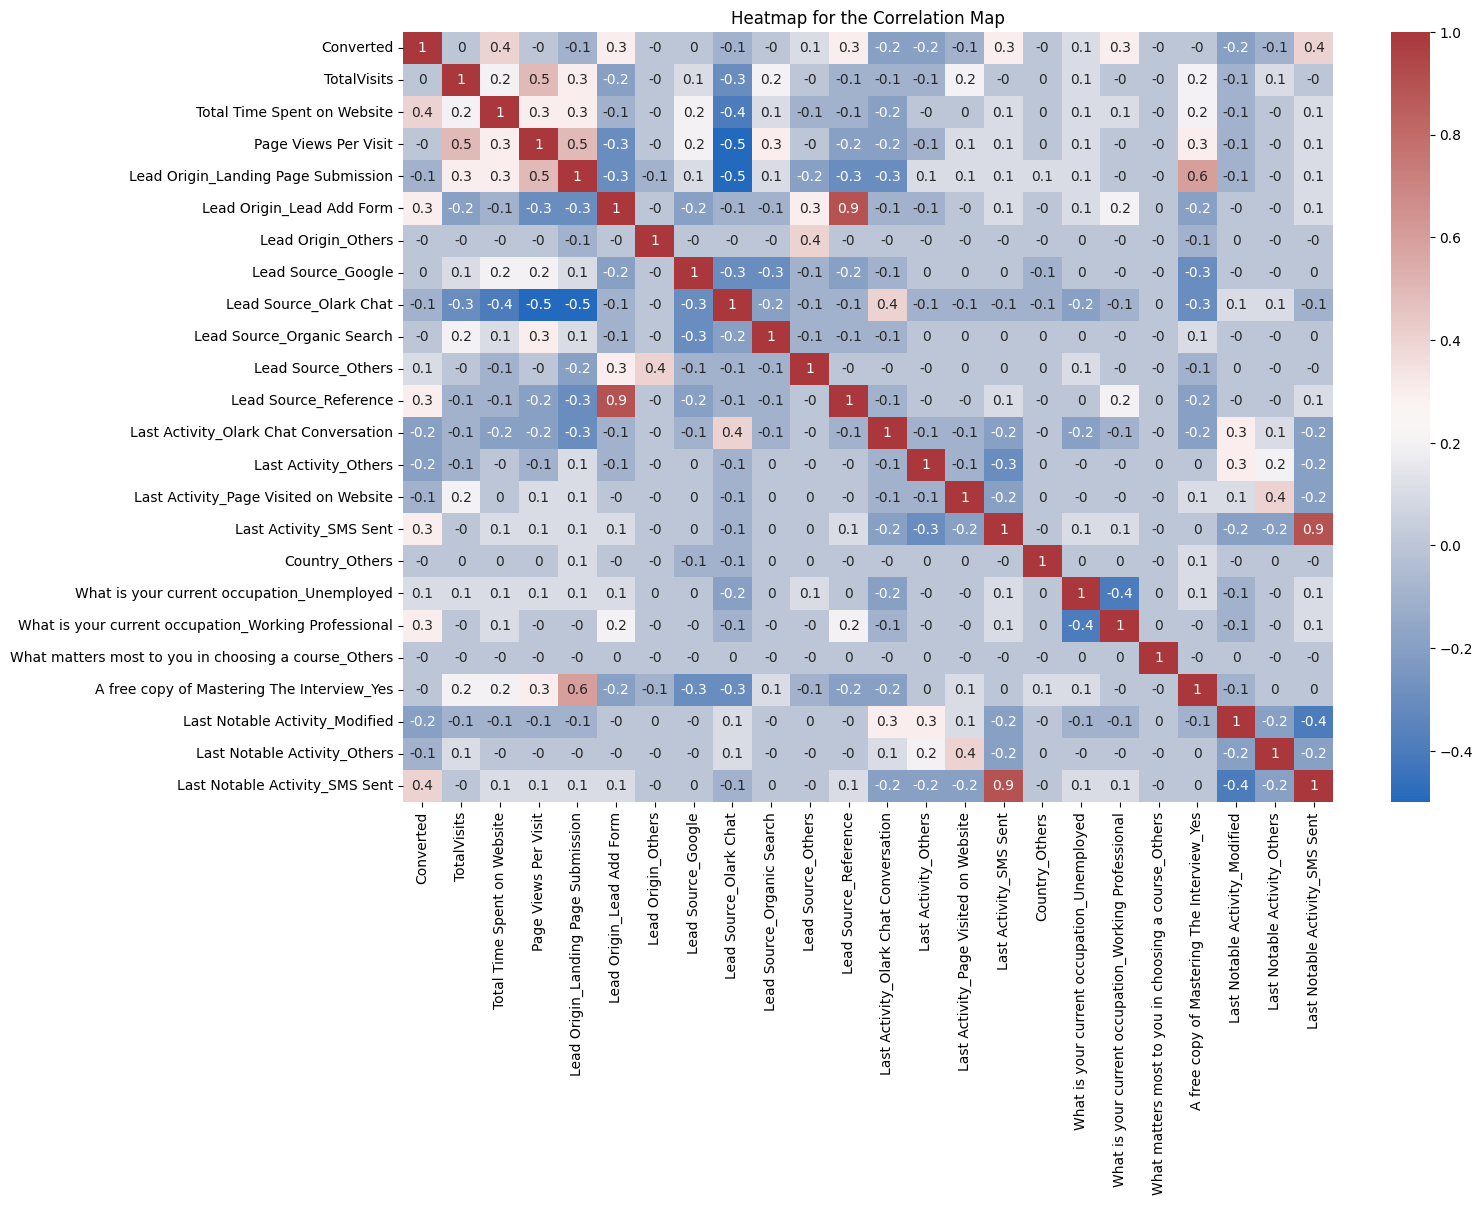

In [26]:
plt.figure(figsize=(15,10))
sns.heatmap(round(data.corr(), 1), annot=True, cmap='vlag')
plt.title('Heatmap for the Correlation Map')
plt.show()

Removing columns with high correlation

In [27]:
data.drop(['Last Activity_SMS Sent', 'Lead Origin_Lead Add Form'], axis=1, inplace=True)

# Splitting Data and Scaling

In [28]:
data_train, data_test = train_test_split(data, train_size=0.7, test_size=0.3, random_state=100)

In [29]:
# scaler = MinMaxScaler()
# data[numeric_cols] = scaler.fit_transform(data[numeric_cols])

In [30]:
y_train = data_train.pop('Converted')
X_train = data_train

In [31]:
scaler = MinMaxScaler()
categorical_cols = [i for i in X_train.select_dtypes(include='object').columns]
numeric_cols = [i for i in X_train.select_dtypes(include='number').columns]
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])

#### Recursive Feature elimination

In [32]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [33]:
rfe = RFE(estimator=model, n_features_to_select=15).fit(X_train, y_train)
selected_cols = X_train.columns[rfe.support_]
X_train = X_train[selected_cols]

In [34]:
X_train_sm = sm.add_constant(X_train)
logm = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2720.2
Date:                Sun, 19 Mar 2023   Deviance:                       5440.5
Time:                        13:24:15   Pearson chi2:                 7.11e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3863
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

Since all p values are <0.05, we will move forward

In [35]:
# #  dropping Country_Others because of high p value
# X_train_sm.drop('Country_Others', axis=1, inplace=True)

# # Refitting the model
# logm = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
# res = logm.fit()
# print(res.summary())

In [36]:
# dropping columns in the main test dataframe
X_train = X_train[[i for i in X_train_sm.columns if i != 'const']]

In [37]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Page Views Per Visit,3.43
3,Lead Origin_Landing Page Submission,3.03
11,What is your current occupation_Unemployed,2.67
1,Total Time Spent on Website,2.05
0,TotalVisits,1.96
5,Lead Source_Olark Chat,1.58
14,Last Notable Activity_SMS Sent,1.56
13,Last Notable Activity_Others,1.53
10,Last Activity_Page Visited on Website,1.47
8,Last Activity_Olark Chat Conversation,1.45


VIF values are under 5 for all our variables, so we can proceed further. 

# Metrics and finding Optimal Cutoff

In [38]:
y_train_prob = pd.Series(res.predict(X_train_sm).values)
def cutoff(prob, cutoff):
    return prob.map(lambda x: 1 if x > cutoff else 0)

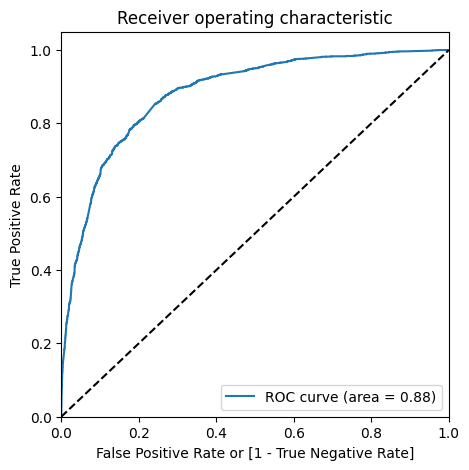

In [39]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

    return None

draw_roc(y_train, y_train_prob)

In [40]:
def confusion_metrics(confusion):
    TP = confusion[1,1] # true positive 
    TN = confusion[0,0] # true negatives
    FP = confusion[0,1] # false positives
    FN = confusion[1,0] # false negatives
    total = sum(sum(confusion))
    return {
        'sensitivity' : TP / float(TP+FN),
        'specifity' : TN / float(TN+FP),
        'accuracy' : (TN+TP) / float(total),
        'precision' : TP / float(TP + FP),
        'recall' : TP / float(TP + FN)
    }

In [41]:
y_train_df = pd.DataFrame()
y_train_df['prob'] = [i/100 for i in range(100)]
y_train_df['accuracy'] = y_train_df.prob.apply(lambda x: confusion_metrics(metrics.confusion_matrix(y_true=y_train, y_pred=cutoff(y_train_prob, x)))['accuracy'])
y_train_df['sensitivity'] = y_train_df.prob.apply(lambda x: confusion_metrics(metrics.confusion_matrix(y_true=y_train, y_pred=cutoff(y_train_prob, x)))['sensitivity'])
y_train_df['specifity'] = y_train_df.prob.apply(lambda x: confusion_metrics(metrics.confusion_matrix(y_true=y_train, y_pred=cutoff(y_train_prob, x)))['specifity'])

# confusion_metrics(metrics.confusion_matrix(y_true=y_train, y_pred=cutoff(y_train_prob, y_train_df['prob'])))['accuracy']

In [42]:
y_train_df

,prob,accuracy,sensitivity,specifity
0,0.00,0.381262,1.000000,0.000000
1,0.01,0.382035,1.000000,0.001249
2,0.02,0.394403,1.000000,0.021239
3,0.03,0.411874,0.997972,0.050725
4,0.04,0.466759,0.995134,0.141179
...,...,...,...,...
95,0.95,0.671305,0.143958,0.996252
96,0.96,0.664811,0.126115,0.996752
97,0.97,0.659555,0.111111,0.997501
98,0.98,0.652752,0.092052,0.998251


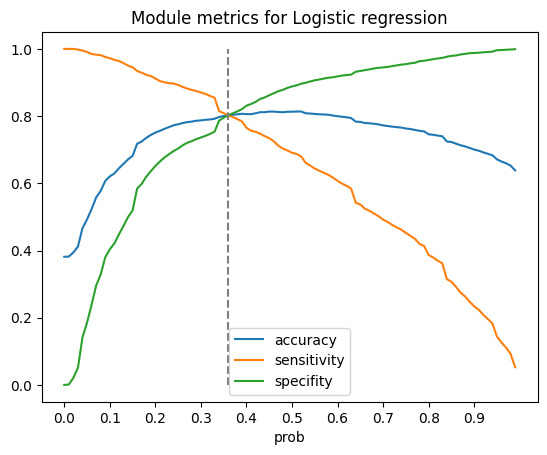

In [43]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
y_train_df.plot.line(x='prob', y=['accuracy','sensitivity','specifity'])
plt.title('Module metrics for Logistic regression')
plt.plot((0.36,0.36),(0,1), '--', color = 'gray')
plt.xticks([i/10 for i in range(10)])
plt.show()

From the graph, we can determine that the optimal cutoff is 0.36

Now, we wil calculate Accuracy, Sensitivity and Specifity for this cutoff value

In [44]:
y_train_df.iloc[36]

prob           0.360000
accuracy       0.802566
sensitivity    0.802514
specifity      0.802599
Name: 36, dtype: float64

Calculating the F1 Score

In [45]:
metrics.f1_score(y_true=y_train, y_pred=cutoff(y_train_prob, 0.36))

0.7560649474689588

# Predicting on the test set

Splitting x and y

In [46]:
y_test = data_test.pop('Converted')
X_test = data_test

transforming the test set

In [47]:
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

In [48]:
X_test = sm.add_constant(X_test[X_train.columns])
X_test

,const,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Others,Lead Source_Olark Chat,Lead Source_Others,Lead Source_Reference,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Others,Last Notable Activity_SMS Sent
4269,1.0,0.031873,0.444982,0.145455,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2376,1.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
7766,1.0,0.019920,0.025968,0.090909,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
9199,1.0,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4359,1.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8649,1.0,0.059761,0.127641,0.027273,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2152,1.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
7101,1.0,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5331,1.0,0.011952,0.707746,0.054545,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


performing prediction on the test set

In [49]:
score = res.predict(X_test)*100
y_test_pred = cutoff(res.predict(X_test),0.36)
confusion = metrics.confusion_matrix(y_test, y_test_pred)

Text(0.5, 1.0, 'Confusion Matrix')

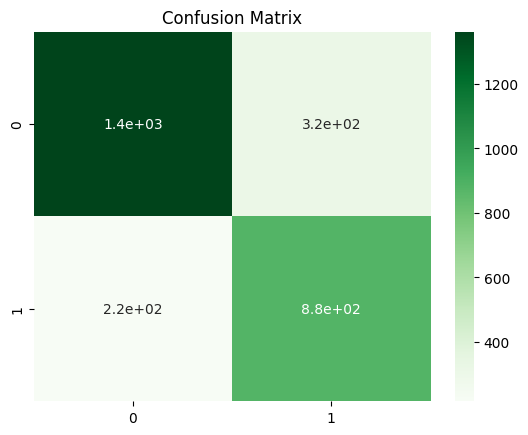

In [50]:
sns.heatmap(confusion, annot = True, cmap='Greens')
plt.title('Confusion Matrix')

### Calculating Accuracy, Sensitivity, Specifity, Precision and Recall

In [51]:
print('The accuracy on the test set is', confusion_metrics(confusion)['accuracy'])
print('The sensitivity on the test set is', confusion_metrics(confusion)['sensitivity'])
print('The specifity on the test set is', confusion_metrics(confusion)['specifity'])
print('The precision on the test set is', confusion_metrics(confusion)['precision'])
print('The recall on the test set is', confusion_metrics(confusion)['recall'])


The accuracy on the test set is 0.8084415584415584
The sensitivity on the test set is 0.8027397260273973
The specifity on the test set is 0.8121645796064401
The precision on the test set is 0.7361809045226131
The recall on the test set is 0.8027397260273973


### Calculating the F1 Score

In [52]:
print('the f1 score is', metrics.f1_score(y_test, y_test_pred))

the f1 score is 0.7680209698558322


### Assigning the score variable

In [53]:
data_test['score'] = score
data_test.score.head(10)

4269    57.034199
2376    94.610093
7766    63.364053
9199     8.244914
4359    83.548922
9186    54.921772
1631    44.765284
8963    28.207767
8007     2.655939
5324    38.230438
Name: score, dtype: float64